In [97]:
# Importing necessary dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [98]:
df = pd.read_csv("/content/covid_19_clean_complete (1).csv", parse_dates = ['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [99]:
# Renaming columns for easy usage
df.rename(columns = {'Date': 'date',
                      'Province/State': 'state',
                      'Country/Region': 'country',
                      'Lat' : 'lat', 'Long': 'long',
                      'Confirmed' : 'confirmed',
                      'Deaths' : 'deaths',
                      'Recovered' : 'recovered'},
            inplace = True)

In [100]:
# Active Cases
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [101]:
# combining the latest data for the countries
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed', 'active', 'deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [102]:
figure = px.choropleth(world, locations = 'country',
                        locationmode = 'country names', color = 'active',
                        hover_name = 'country', range_color = [1,1000],
                        color_continuous_scale = "greens",
                        title = "Countries with Active Cases")

figure.show()

In [103]:
# Determine the Total Confimed Cases grouped by Date
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

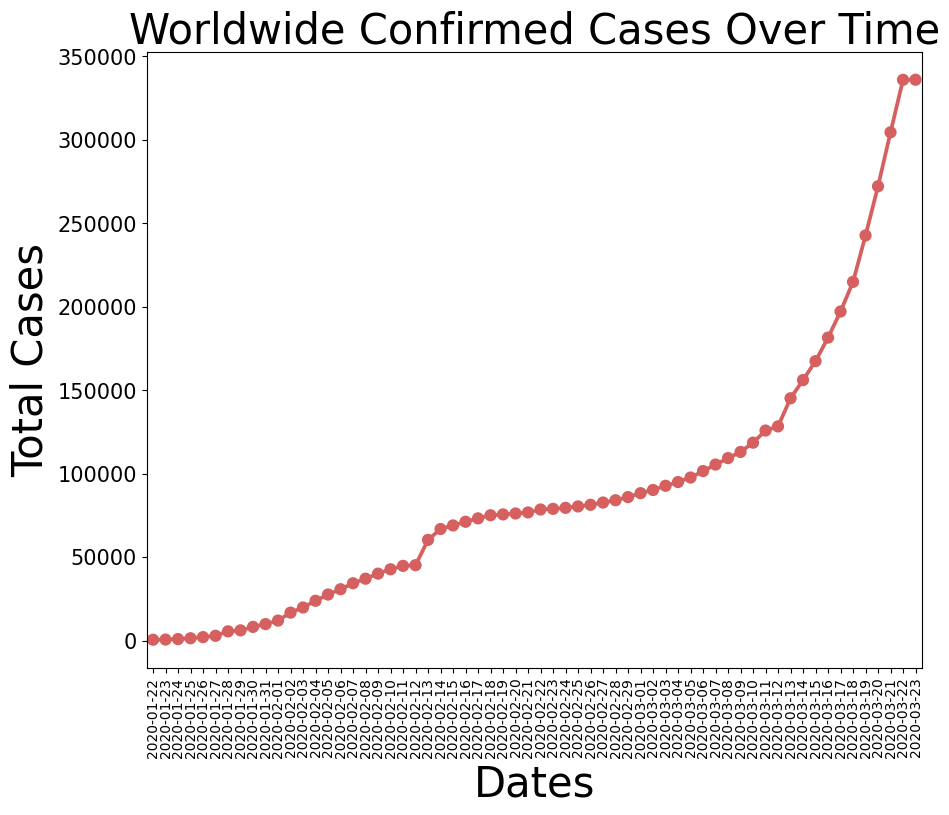

In [104]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90, fontsize= 10)
plt.yticks (fontsize = 15)
plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total Cases", fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time", fontsize = 30)

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = 'r')
ax.set(xlabel = 'Dates', ylabel = 'Total Cases')

In [105]:
# Current Top Countries having most Active Cases
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

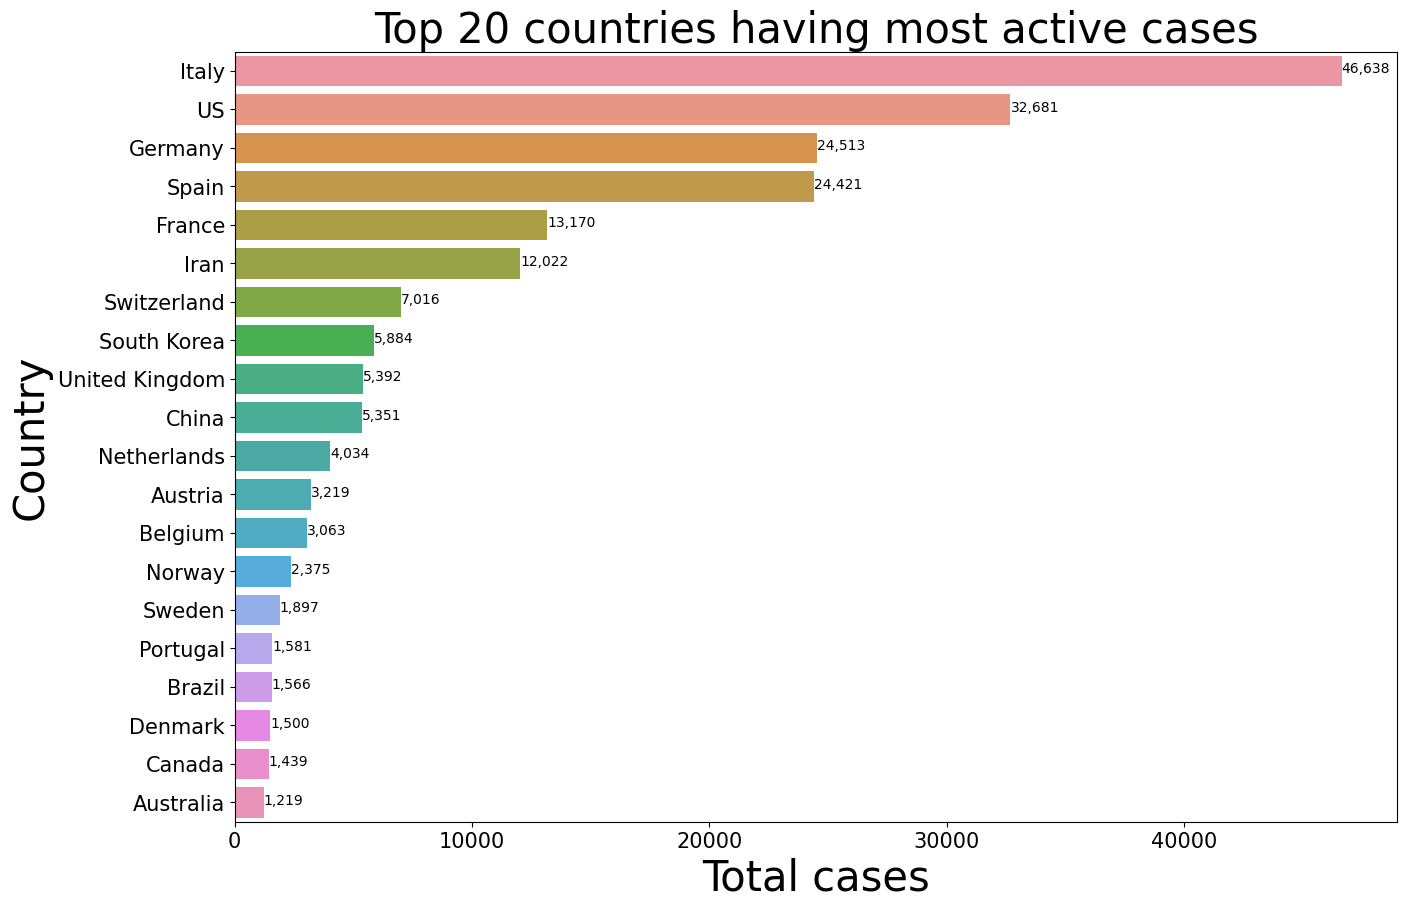

In [106]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize= 15)
plt.yticks (fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel("Country", fontsize = 30)
plt.title("Top 20 countries having most active cases", fontsize = 30)

ax = sns.barplot(x = top_actives.active, y = top_actives.country)

for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha ='left', va = 'center')

ax.set(xlabel = 'Total cases', ylabel = 'Country')

In [107]:
# Data of China
china = df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28.0,17.0,548.0,503.0
1,2020-01-23,30.0,18.0,643.0,595.0
2,2020-01-24,36.0,26.0,920.0,858.0
3,2020-01-25,39.0,42.0,1406.0,1325.0
4,2020-01-26,49.0,56.0,2075.0,1970.0


In [108]:
# Data of USA
us = df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

,date,recovered,deaths,confirmed,active
0,2020-02-24,0.0,0.0,36.0,36.0
1,2020-02-25,0.0,0.0,36.0,36.0
2,2020-02-26,0.0,0.0,42.0,42.0
3,2020-02-27,0.0,0.0,42.0,42.0
4,2020-02-28,0.0,0.0,44.0,44.0


In [109]:
# Data of Italy
italy = df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0


In [110]:
india = df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india.head()

,date,recovered,deaths,confirmed,active
0,2020-01-30,0.0,0.0,1.0,1.0
1,2020-01-31,0.0,0.0,1.0,1.0
2,2020-02-01,0.0,0.0,1.0,1.0
3,2020-02-02,0.0,0.0,2.0,2.0
4,2020-02-03,0.0,0.0,3.0,3.0


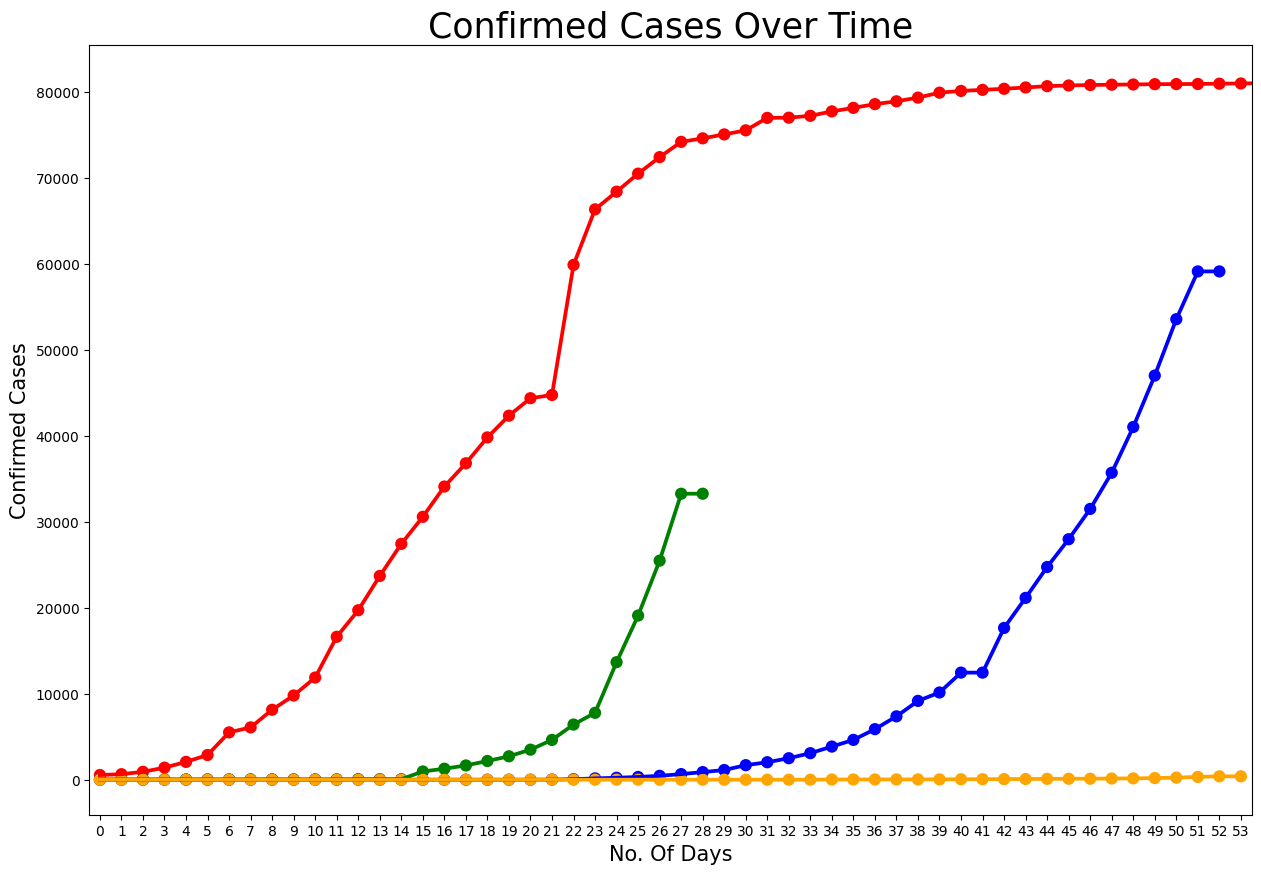

In [111]:
plt.figure(figsize=(15,10))
sns.pointplot(x=china.index, y=china.confirmed, color='red')
sns.pointplot(x=us.index, y=us.confirmed, color='green')
sns.pointplot(x=italy.index, y=italy.confirmed, color='blue')
sns.pointplot(x=india.index, y=india.confirmed, color='orange')
plt.title('Confirmed Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Confirmed Cases', fontsize = 15)
plt.show()

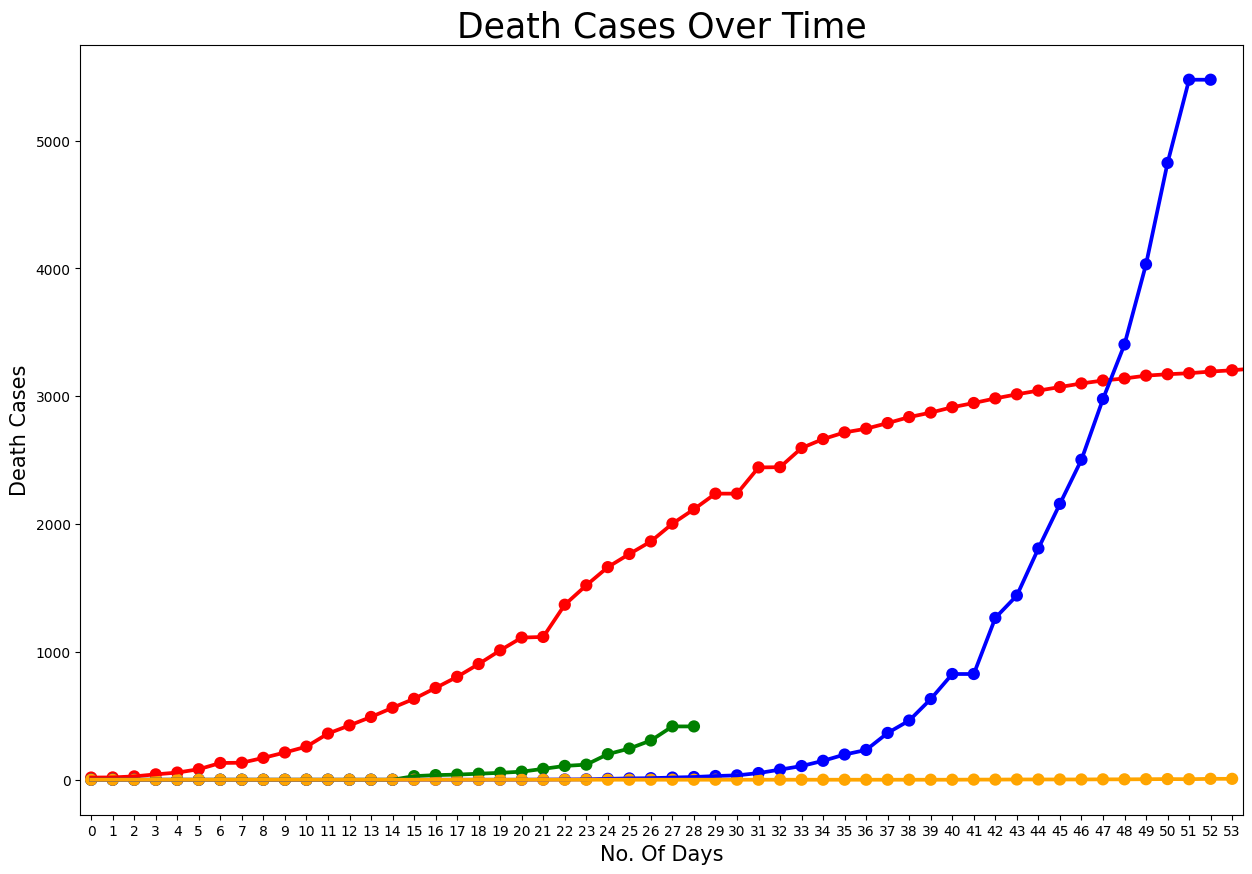

In [112]:
plt.figure(figsize=(15,10))

sns.pointplot(x=china.index, y=china.deaths, color='red')
sns.pointplot(x=us.index, y=us.deaths, color='green')
sns.pointplot(x=italy.index, y=italy.deaths, color='blue')
sns.pointplot(x=india.index, y=india.deaths, color='orange')
plt.title('Death Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Death Cases', fontsize = 15)
plt.show()

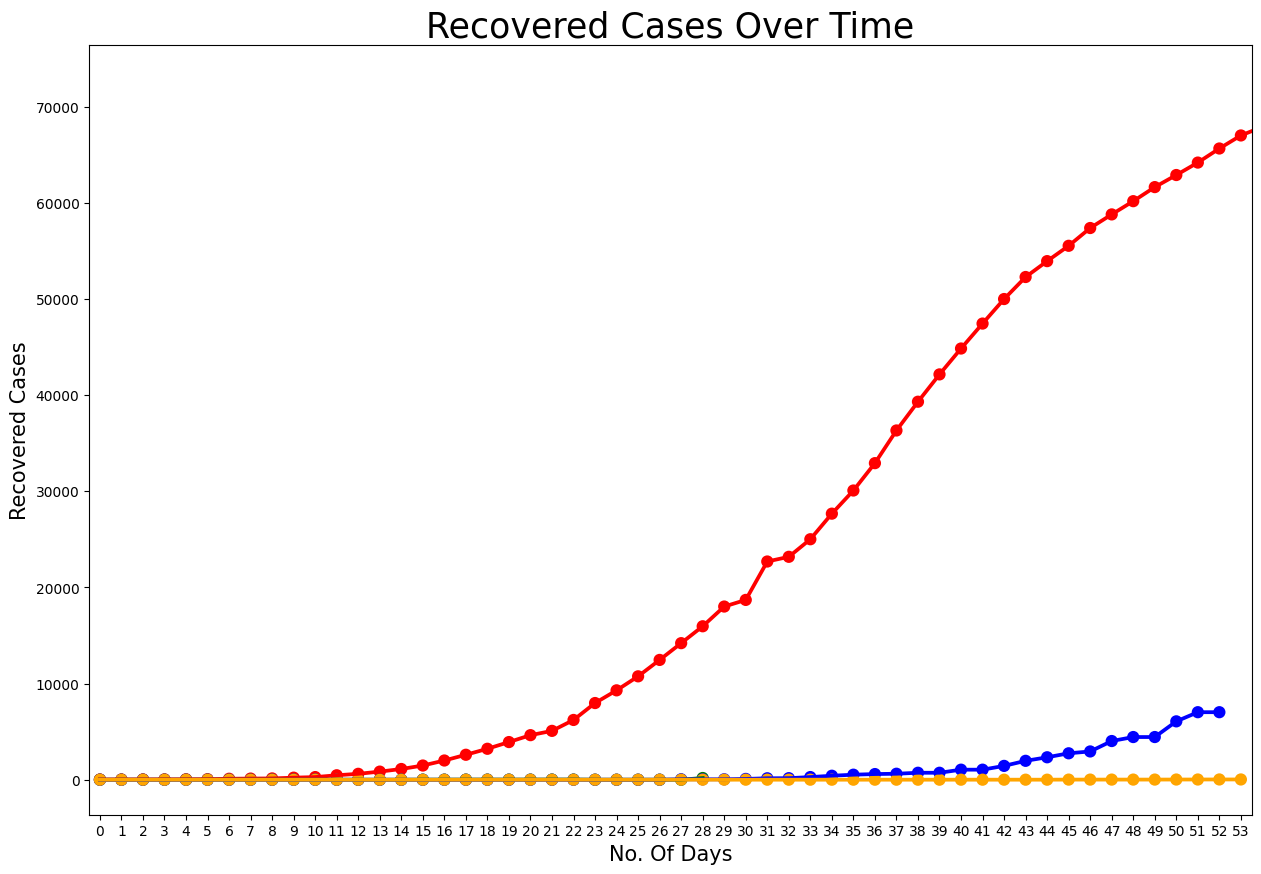

In [113]:
plt.figure(figsize=(15,10))

sns.pointplot(x=china.index, y=china.recovered, color='red')
sns.pointplot(x=us.index, y=us.recovered, color='green')
sns.pointplot(x=italy.index, y=italy.recovered, color='blue')
sns.pointplot(x=india.index, y=india.recovered, color='orange')
plt.title('Recovered Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Recovered Cases', fontsize = 15)
plt.show()

# Detailed Analysis of COVID Cases in India

In [114]:
df_india = pd.read_excel('/content/covid_19_india (1).xlsx')
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [115]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [116]:
df_india['Total Active'] = df_india['Total Cases'] - (df_india['Death'] + df_india['Cured'])
total_active = df_india['Total Active'].sum()
print('Total Number of Active COVID 19 cases across India', total_active)
Tot_Cases = df_india.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='hot_r')

Total Number of Active COVID 19 cases across India 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

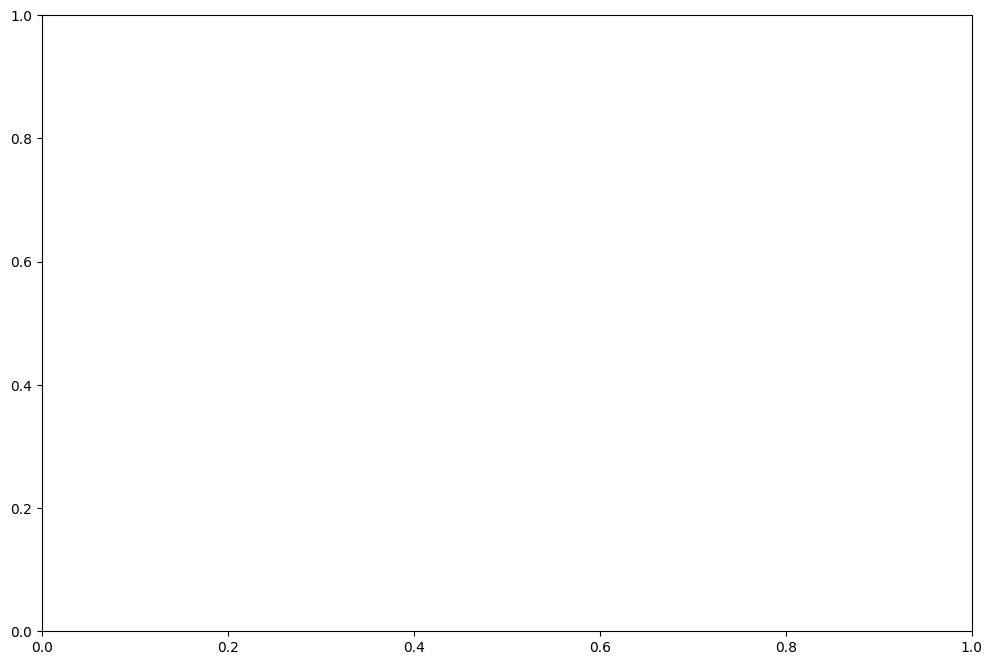

In [117]:
plt.subplots(figsize=(12,8))

[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

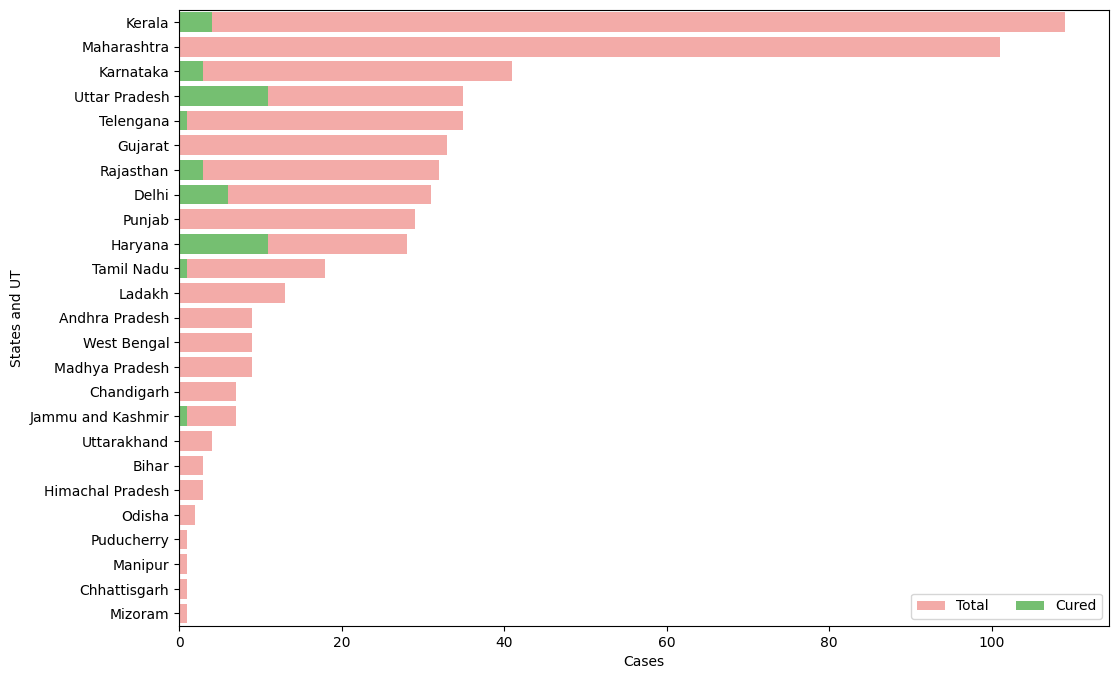

In [118]:
f,ax= plt.subplots(figsize=(12,8))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")

ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="States and UT", xlabel="Cases")


# Insights into COVID cases globally

In [119]:
df_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global (1).csv')
df_recovered = pd.read_csv('/content/time_series_covid19_recovered_global (1).csv')
df_deaths = pd.read_csv('/content/time_series_covid19_deaths_global (1).csv')

df_confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns = {'Country/Region':'Country'}, inplace=True)

In [120]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [121]:
df_recovered.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


In [122]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [124]:
df2 = df.groupby(['date', 'country', 'state'])[['date', 'state', 'country', 'confirmed', 'deaths', 'recovered']]
df2.head()

,date,state,country,confirmed,deaths,recovered
5,2020-01-22,British Columbia,Canada,0.0,0.0,0.0
6,2020-01-22,New South Wales,Australia,0.0,0.0,0.0
7,2020-01-22,Victoria,Australia,0.0,0.0,0.0
8,2020-01-22,Queensland,Australia,0.0,0.0,0.0
19,2020-01-22,South Australia,Australia,0.0,0.0,0.0
...,...,...,...,...,...,...
19191,2020-03-23,Sint Maarten,Netherlands,1.0,0.0,0.0
19194,2020-03-23,Isle of Man,United Kingdom,5.0,0.0,0.0
19196,2020-03-23,Northwest Territories,Canada,1.0,0.0,0.0
19210,2020-03-23,United States Virgin Islands,US,6.0,0.0,0.0


In [125]:
df_india_cases = df.query('country == "India"').groupby("date")[['confirmed', 'deaths', 'recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india_cases[['date', 'confirmed']], df_india_cases[['date', 'deaths']], df_india_cases[['date', 'recovered']]

In [126]:
df.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0,509.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0,604.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0,877.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0,1351.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0,2005.0


In [127]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['recovered'].reset_index()

In [128]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['confirmed'], mode='lines+markers', name='confirmed', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered'], mode='lines+markers', name='recovered', line = dict(color = 'green')))
fig.update_layout(title_text='World wide COVID-19 Cases', xaxis_tickfont_size = 14, yaxis=dict(title='Number of Cases'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# TimeSeries Analysis of COVID cases globally and India in Particular

In [129]:
#!pip install pystan~=2.14
!pip install prophet

In [130]:
import warnings;
warnings.simplefilter('ignore')

In [131]:
import prophet as pr

In [132]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])


In [133]:
m = pr.Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/vlepshuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/_7anx0ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65641', 'data', 'file=/tmp/tmp5a09ibxn/vlepshuc.json', 'init=/tmp/tmp5a09ibxn/_7anx0ed.json', 'output', 'file=/tmp/tmp5a09ibxn/prophet_modelizspqaej/prophet_model-20231020052025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [134]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.950111,334596.724435,373463.366664
65,2020-03-27,372235.404795,351136.424048,393142.585551
66,2020-03-28,388675.044314,367420.648194,410145.639822
67,2020-03-29,405308.041156,384611.647758,428161.013063
68,2020-03-30,418529.738846,394770.947104,441089.675021


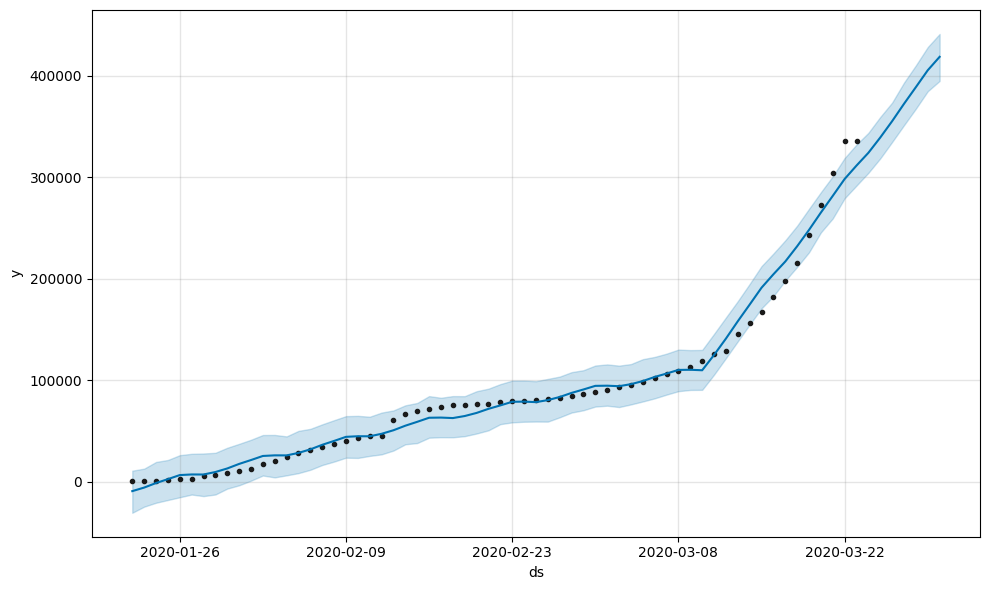

In [135]:
confirmed_forecast_plot = m.plot(forecast)

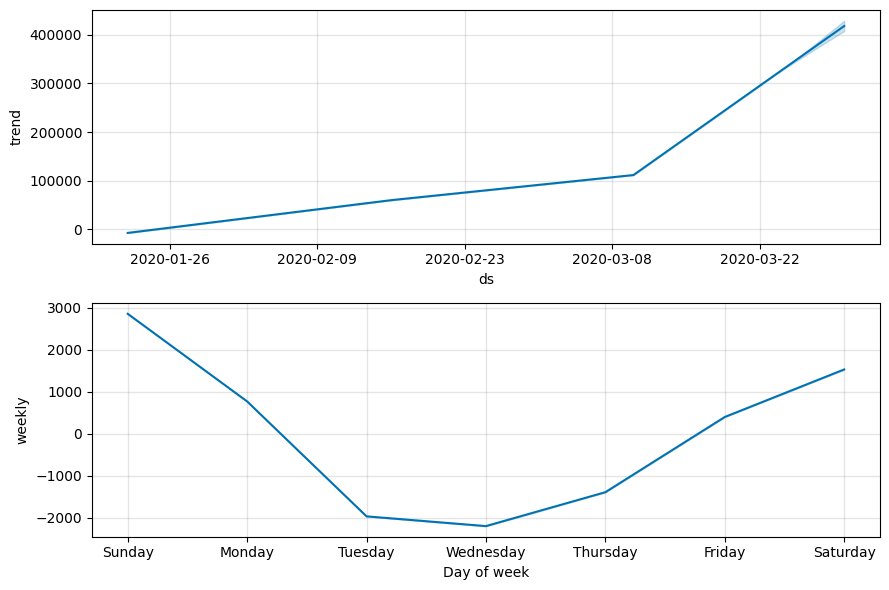

In [136]:
confirmed_forecast_plot = m.plot_components(forecast)

In [137]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [138]:
m = pr.Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/7yf_sbx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/0ongc8kc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74158', 'data', 'file=/tmp/tmp5a09ibxn/7yf_sbx5.json', 'init=/tmp/tmp5a09ibxn/0ongc8kc.json', 'output', 'file=/tmp/tmp5a09ibxn/prophet_model3bd2th0p/prophet_model-20231020052026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [139]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.895821,14807.611960,15965.691328
65,2020-03-27,16199.637166,15571.791021,16835.193521
66,2020-03-28,17006.925198,16371.059597,17635.167912
67,2020-03-29,17831.527103,17202.897134,18487.757944
68,2020-03-30,18491.009178,17799.672900,19172.359367


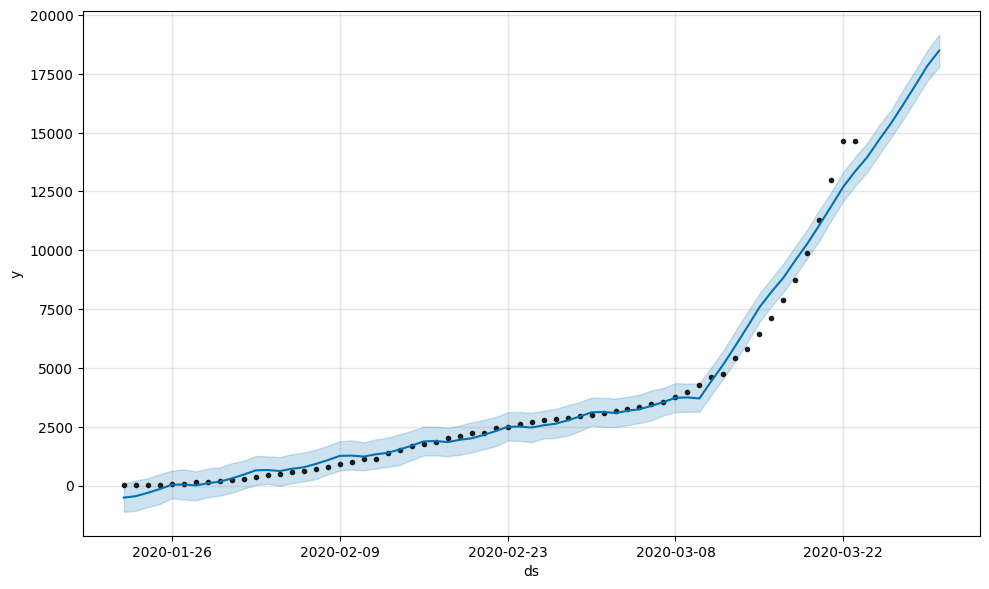

In [140]:
deaths_forecast_plot = m.plot(forecast)

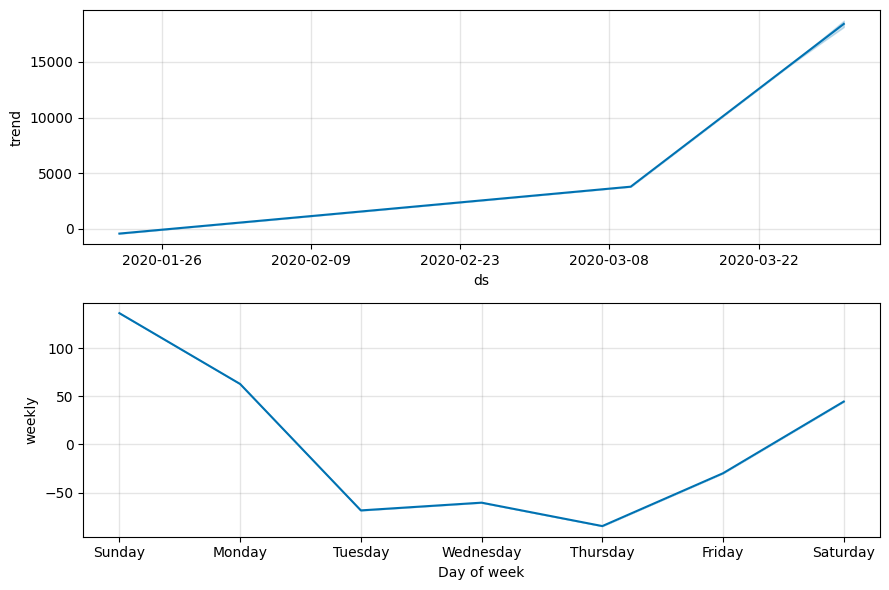

In [141]:
deaths_forecast_plot = m.plot_components(forecast)

In [142]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [143]:
m = pr.Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/1t64xyfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/t0j9uuek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34963', 'data', 'file=/tmp/tmp5a09ibxn/1t64xyfn.json', 'init=/tmp/tmp5a09ibxn/t0j9uuek.json', 'output', 'file=/tmp/tmp5a09ibxn/prophet_modelezuru_tk/prophet_model-20231020052028.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [144]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103261.044240,102107.967665,104294.548653
65,2020-03-27,105630.580767,104541.199992,106835.473267
66,2020-03-28,108578.299082,107310.975304,109938.969077
67,2020-03-29,111470.687048,110079.694708,112993.838542
68,2020-03-30,113631.030775,112016.110417,115301.380978


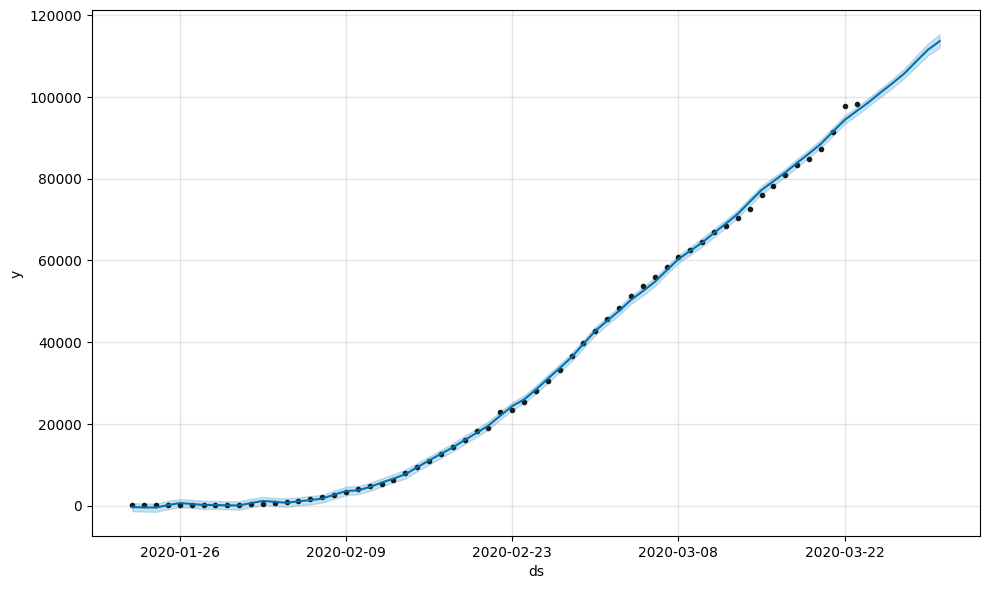

In [145]:
recovered_forecast_plot = m.plot(forecast)

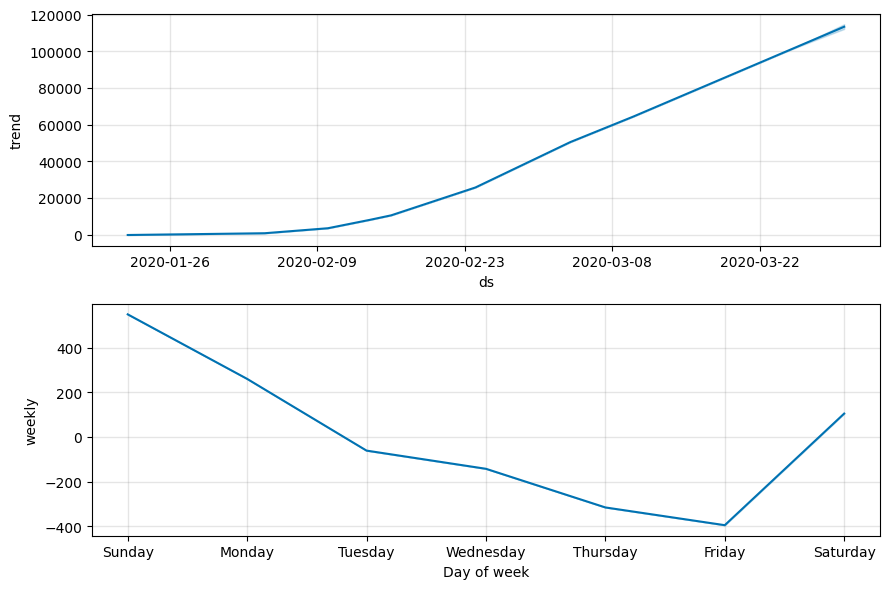

In [146]:
recovered_forecast_plot = m.plot_components(forecast)

In [147]:
india_confirmed.columns = ['ds', 'y']
india_confirmed['ds']= pd.to_datetime(india_confirmed['ds'])

In [148]:
m = pr.Prophet()
m.fit(india_confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/ns5uzdgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/95lgnb0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98881', 'data', 'file=/tmp/tmp5a09ibxn/ns5uzdgn.json', 'init=/tmp/tmp5a09ibxn/95lgnb0o.json', 'output', 'file=/tmp/tmp5a09ibxn/prophet_modelypj_i_1q/prophet_model-20231020052030.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [149]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,153.433398,71.217317,237.236368
65,2020-03-27,160.140573,75.086380,248.918033
66,2020-03-28,172.292186,87.905270,257.852925
67,2020-03-29,181.553314,94.433395,259.729197
68,2020-03-30,183.035794,102.939714,269.765453


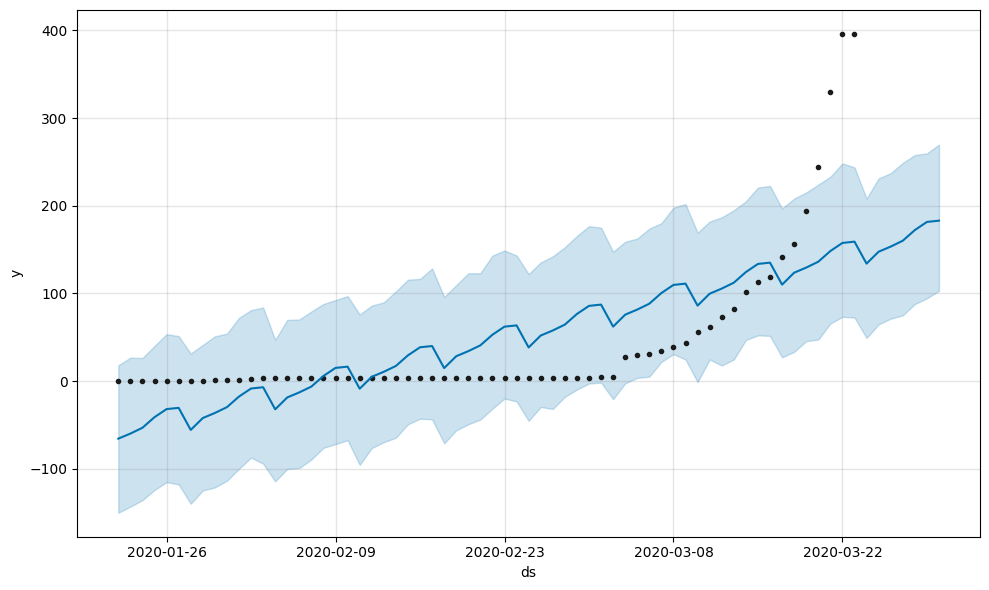

In [150]:
india_confirmed_plot = m.plot(forecast)

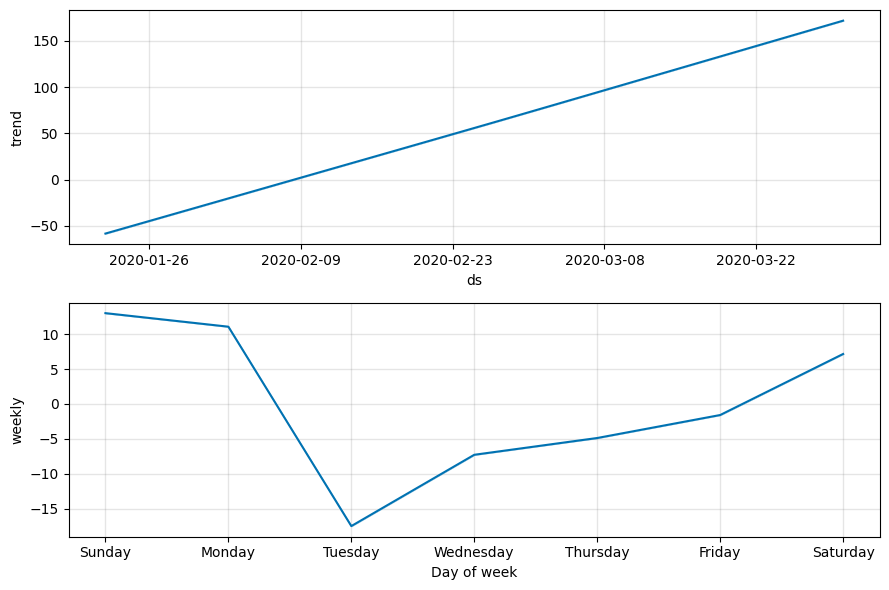

In [151]:
india_confirmed_plot = m.plot_components(forecast)

In [152]:
india_deaths.columns = ['ds', 'y']
india_deaths['ds']= pd.to_datetime(india_deaths['ds'])

In [153]:
m = pr.Prophet()
m.fit(india_deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/am8b1qkv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/c46marfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41439', 'data', 'file=/tmp/tmp5a09ibxn/am8b1qkv.json', 'init=/tmp/tmp5a09ibxn/c46marfz.json', 'output', 'file=/tmp/tmp5a09ibxn/prophet_modelxg9q63mu/prophet_model-20231020052032.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [154]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,2.561540,0.969008,4.036429
65,2020-03-27,2.784176,1.267025,4.351964
66,2020-03-28,2.673482,1.162250,4.243178
67,2020-03-29,3.007218,1.413107,4.592835
68,2020-03-30,3.007621,1.466070,4.576418


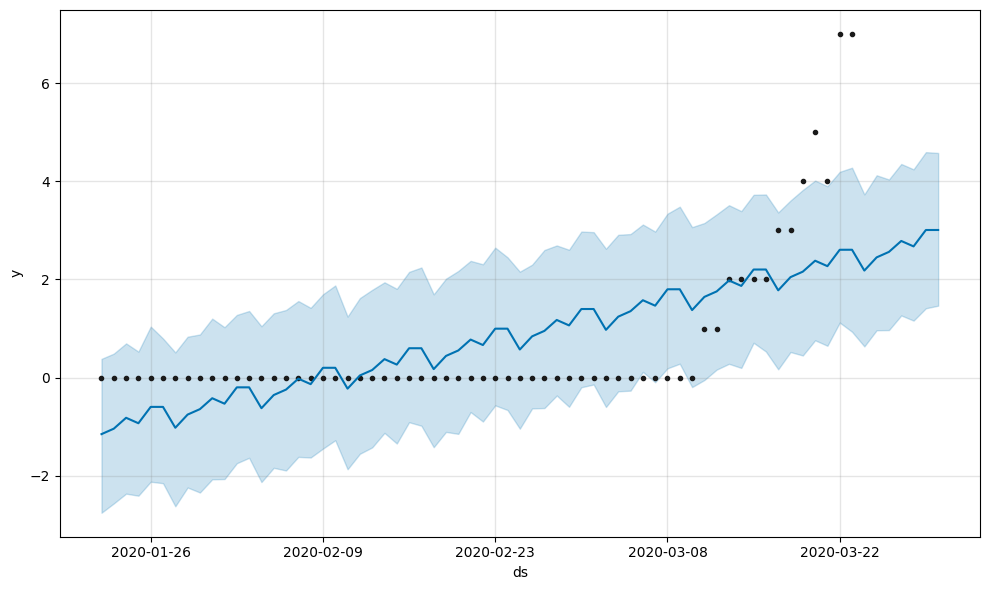

In [155]:
india_deaths_plot = m.plot(forecast)

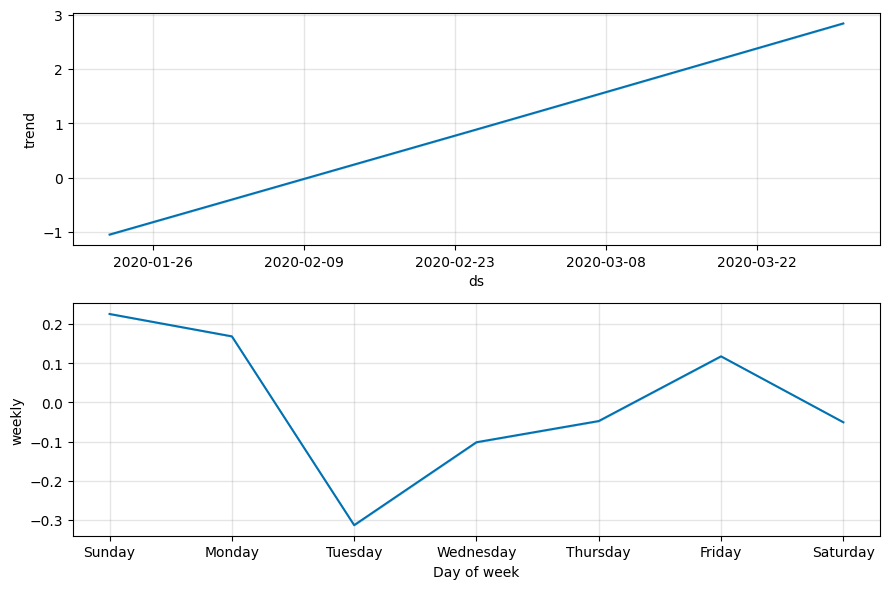

In [156]:
india_deaths_plot = m.plot_components(forecast)

In [157]:
india_recovered.columns = ['ds', 'y']
india_recovered['ds']= pd.to_datetime(india_recovered['ds'])

In [158]:
m = pr.Prophet()
m.fit(india_recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/8kzj9y2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a09ibxn/_fdvatxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96473', 'data', 'file=/tmp/tmp5a09ibxn/8kzj9y2e.json', 'init=/tmp/tmp5a09ibxn/_fdvatxw.json', 'output', 'file=/tmp/tmp5a09ibxn/prophet_modelt9bitfwt/prophet_model-20231020052033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [159]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,12.347320,6.844878,17.659836
65,2020-03-27,12.904069,7.265599,18.121273
66,2020-03-28,13.238539,7.949196,18.537458
67,2020-03-29,15.017419,9.529447,19.995563
68,2020-03-30,15.018438,9.643990,20.759937


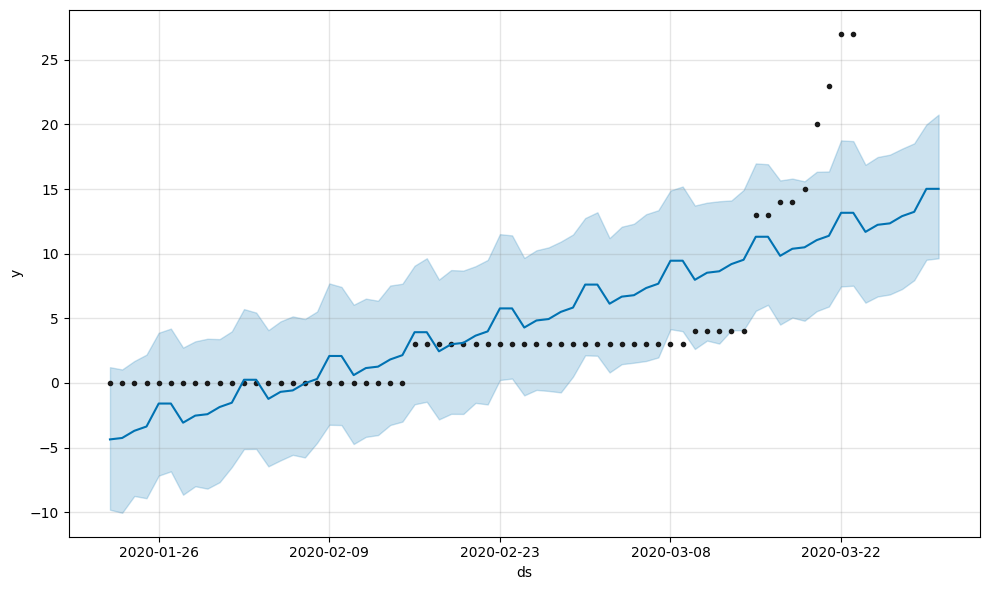

In [160]:
india_recovered_plot = m.plot(forecast)

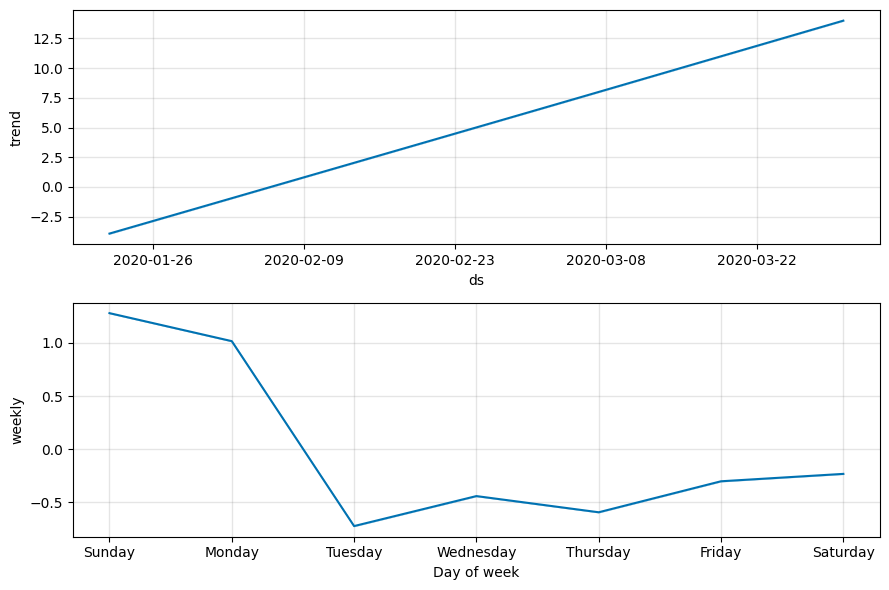

In [161]:
india_recovered_plot = m.plot_components(forecast)